# Project Overview

This project explores and compares several **Supervised Learning** algorithms to determine which method provides the highest prediction accuracy for financial loan approval. The goal is:

- Identify the **most accurate predictive model**.
- Determine the **most influential features** impacting loan approval decisions.

# Dataset Description

The dataset used in this project is the **Loan Prediction Problem Dataset** by *Debdatta Chatterjee*, available on Kaggle:

🔗 [Kaggle Dataset Link](https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset)

The dataset includes:

- **Training Set**: 614 loan applications with known approval status.
- **Test Set**: 367 loan applications without approval status.

Each record contains demographic and financial details of loan applicants, such as:

- Gender, Marital Status, Education, Employment
- Applicant & Coapplicant Income
- Loan Amount & Term
- Credit History
- Property Area

# Models Evaluated

The following **Supervised Learning algorithms** will be trained and tested on this dataset:

- Linear Regression
- Random Forest
- Support Vector Machine (SVM)
- K-Nearest Neighbors (KNN)
- Decision Tree

Each model's performance will be assessed using classification accuracy and other relevant metrics to determine which algorithm is best suited for predicting loan approvals.

---


In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
     

In [37]:
# Load training and test datasets from GitHub (correct raw URLs)
train = pd.read_csv('https://raw.githubusercontent.com/Romu-tech/DTSA5509FINAL/main/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Romu-tech/DTSA5509FINAL/main/test.csv')



In [38]:
train.info()
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB



In [39]:
test.info()
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB



# Now we can begin data cleaning

- Based on the non null counts of the data on both sets of data, we have missing values.
- We need to Impute the missing values with varbiable mode for Categorical Values, and Impute the missing values with the variable median for Numerical Values
- We also need to identify entries which have outliers in numerical features and floor or cap them within the datasets. 

🔍 Missing values before cleaning:
Train:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64 

Test:
 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64 



/var/folders/w8/xqm209c55_d0dct36jr38pym0000gn/T/ipykernel_9231/1273581694.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/var/folders/w8/xqm209c55_d0dct36jr38pym0000gn/T/ipykernel_9231/1273581694.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

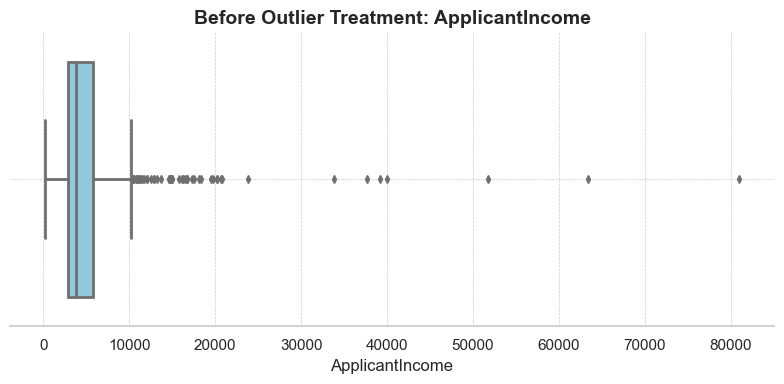

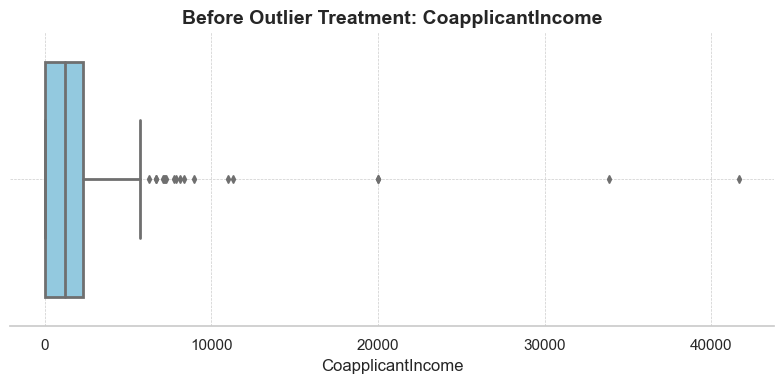

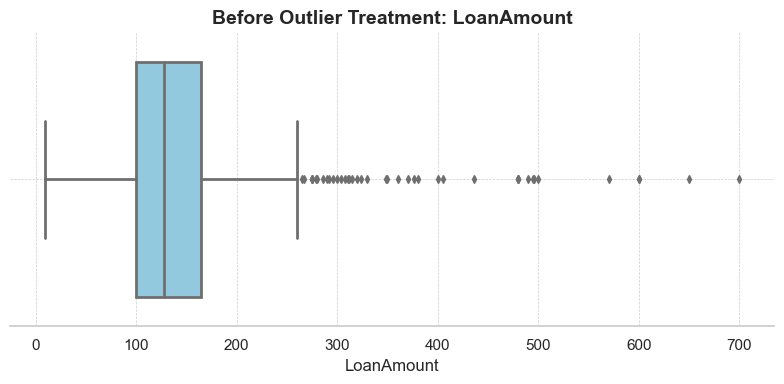

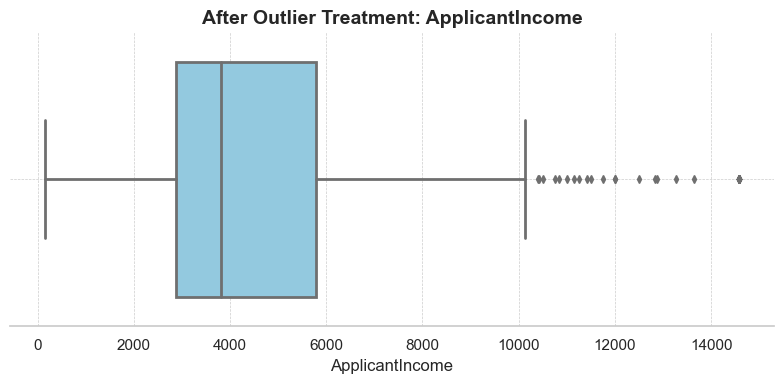

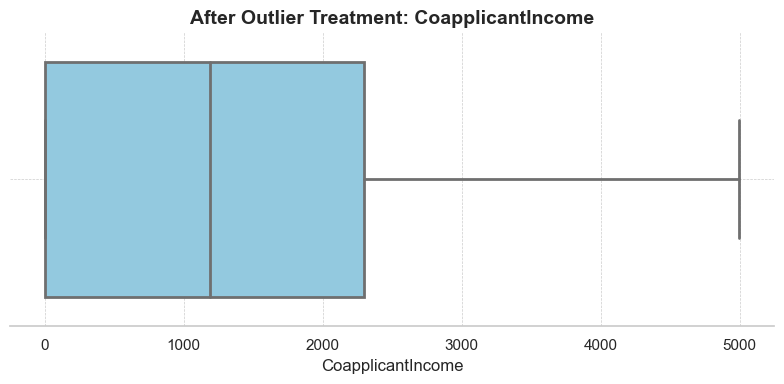

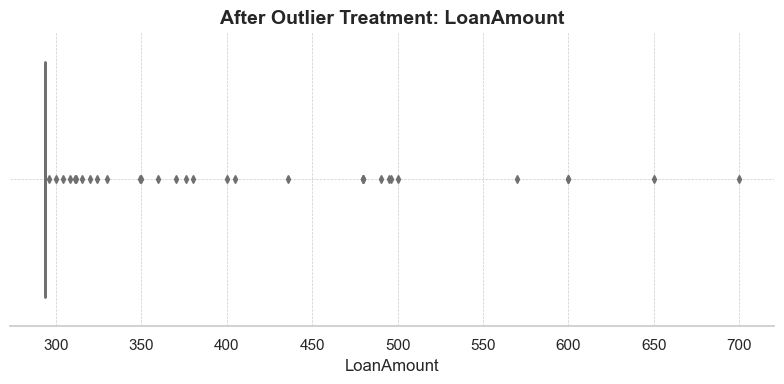


Missing values after cleaning:
Train:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64 

Test:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn theme for better aesthetics
sns.set_theme(style='whitegrid')

# Show missing values before cleaning
print("🔍 Missing values before cleaning:")
print("Train:\n", train.isnull().sum(), "\n")
print("Test:\n", test.isnull().sum(), "\n")

# Define columns
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']
numerical_cols = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Function to impute missing values
def impute_data(df):
    for col in categorical_cols:
        if col in df.columns:
            df[col].fillna(df[col].mode()[0], inplace=True)
    for col in numerical_cols:
        if col in df.columns:
            df[col].fillna(df[col].median(), inplace=True)

# Apply imputation
impute_data(train)
impute_data(test)

# Function to cap or floor outliers
def handle_outliers(df, col, method='cap', quantile=0.95):
    limit = df[col].quantile(quantile if method == 'cap' else 1 - quantile)
    if method == 'cap':
        df[col] = np.where(df[col] > limit, limit, df[col])
    else:
        df[col] = np.where(df[col] < limit, limit, df[col])

# Enhanced boxplot function
def fancy_boxplot(df, col, title):
    plt.figure(figsize=(8, 4))
    ax = sns.boxplot(x=df[col], color='skyblue', linewidth=2, fliersize=4)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel(col, fontsize=12)
    ax.grid(True, linestyle='--', linewidth=0.5)
    sns.despine(left=True)
    plt.tight_layout()
    plt.show()

# Plot before outlier treatment
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    fancy_boxplot(train, col, f"Before Outlier Treatment: {col}")

# Apply outlier treatment
handle_outliers(train, 'ApplicantIncome', method='cap', quantile=0.95)
handle_outliers(train, 'CoapplicantIncome', method='cap', quantile=0.95)
handle_outliers(train, 'LoanAmount', method='floor', quantile=0.05)

# Plot after outlier treatment
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    fancy_boxplot(train, col, f"After Outlier Treatment: {col}")

# Show missing values after cleaning
print("\nMissing values after cleaning:")
print("Train:\n", train.isnull().sum(), "\n")
print("Test:\n", test.isnull().sum())


- We need to use one-hot encoding here, which will help with our data integrity and clear seperation of our train/test transformations. It handles loan_status explicitly, uses drop_first=True to handle dummy variable trap (occurs in statistical modeling when you include all dummy variables representing a categorical variable in your regression model, leading to perfect multicollinearity), and includes a source column to help seperation after merging. 

In [41]:
# Combine train and test to ensure consistent encoding
train['source'] = 'train'
test['source'] = 'test'
combined = pd.concat([train, test], ignore_index=True)

# One-hot encode all categorical features except the target
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
combined_encoded = pd.get_dummies(combined, columns=categorical_cols, drop_first=True)

# Separate back into train and test
train_encoded = combined_encoded[combined_encoded['source'] == 'train'].drop(['source'], axis=1)
test_encoded = combined_encoded[combined_encoded['source'] == 'test'].drop(['source', 'Loan_Status'], axis=1, errors='ignore')

# Map target variable manually
train_encoded['Loan_Status'] = train_encoded['Loan_Status'].map({'N': 0, 'Y': 1})

# Show summary
print("Train data:")
print(train_encoded.info())
print("\nTest data:")
print(test_encoded.info())


Train data:
<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   ApplicantIncome          614 non-null    float64
 2   CoapplicantIncome        614 non-null    float64
 3   LoanAmount               614 non-null    float64
 4   Loan_Amount_Term         614 non-null    float64
 5   Credit_History           614 non-null    float64
 6   Loan_Status              614 non-null    int64  
 7   Gender_Male              614 non-null    bool   
 8   Married_Yes              614 non-null    bool   
 9   Dependents_1             614 non-null    bool   
 10  Dependents_2             614 non-null    bool   
 11  Dependents_3+            614 non-null    bool   
 12  Education_Not Graduate   614 non-null    bool   
 13  Self_Employed_Yes        614 non-null    bool   
 14  Property_Area_Semiu

# Data Cleaning Results

- The output above shosw that we have successfully used one-hot encoding to impute missing data values without getting rid of or trimming any of the value. Most of the object type variables have been converted into a bool structure. This will help maintain the size of the dataset, while hopefully allowing progression in future analysis steps.

# EDA (Exploratory Data Analysis)
- We begin our analysis by exploring how the target variable, Loan_Status, interacts with other features in the training dataset. This involves both visual and statistical techniques to uncover patterns and potential predictors.

- Following this, we’ll construct a correlation matrix to examine the relationships between numerical variables, helping to highlight those most closely associated with loan approval outcomes.

- Finally, we’ll apply Chi-square tests of independence on categorical variables to assess which factors show statistically significant associations with loan approval status.

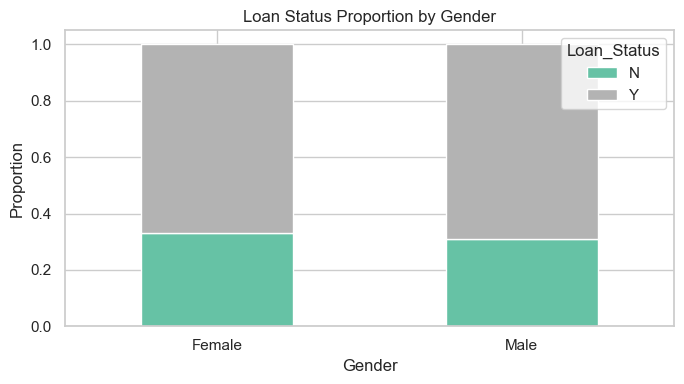

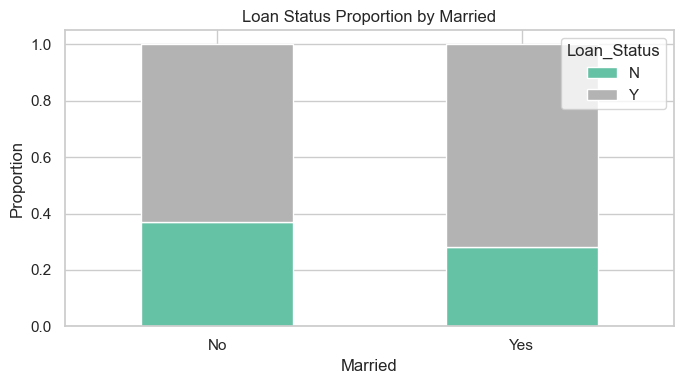

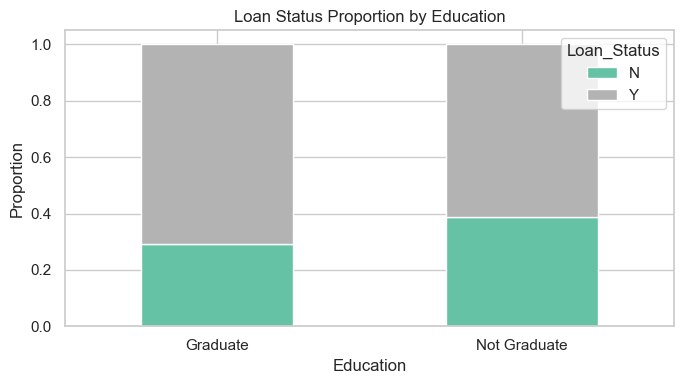

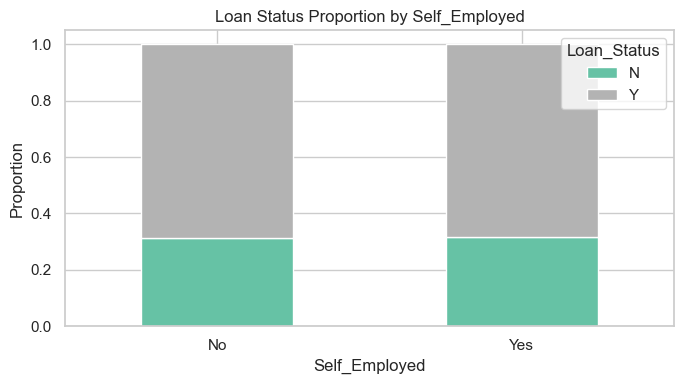

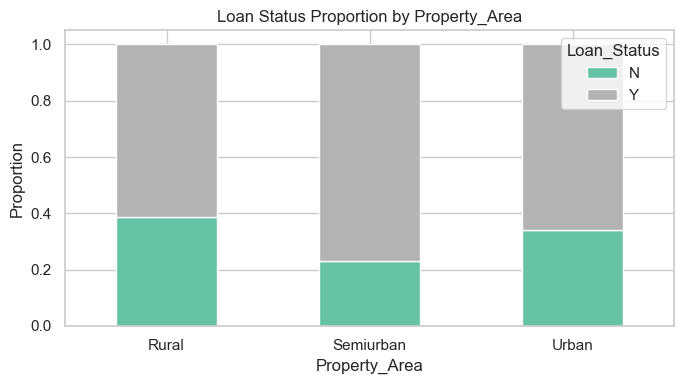

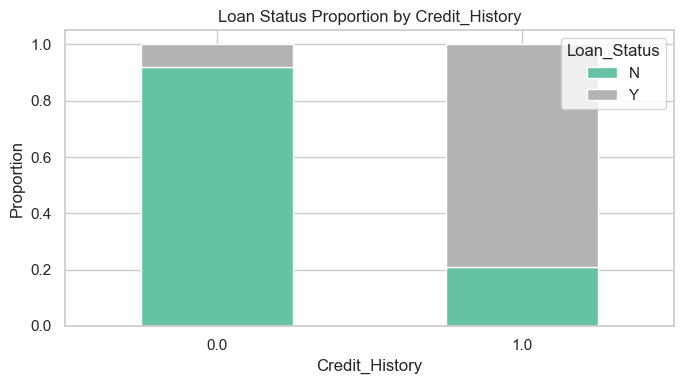


Mean values grouped by Loan_Status:

             ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
Loan_Status                                                                  
N                    4881.01            1356.47      299.66            344.56
Y                    4895.65            1403.92      300.01            341.43


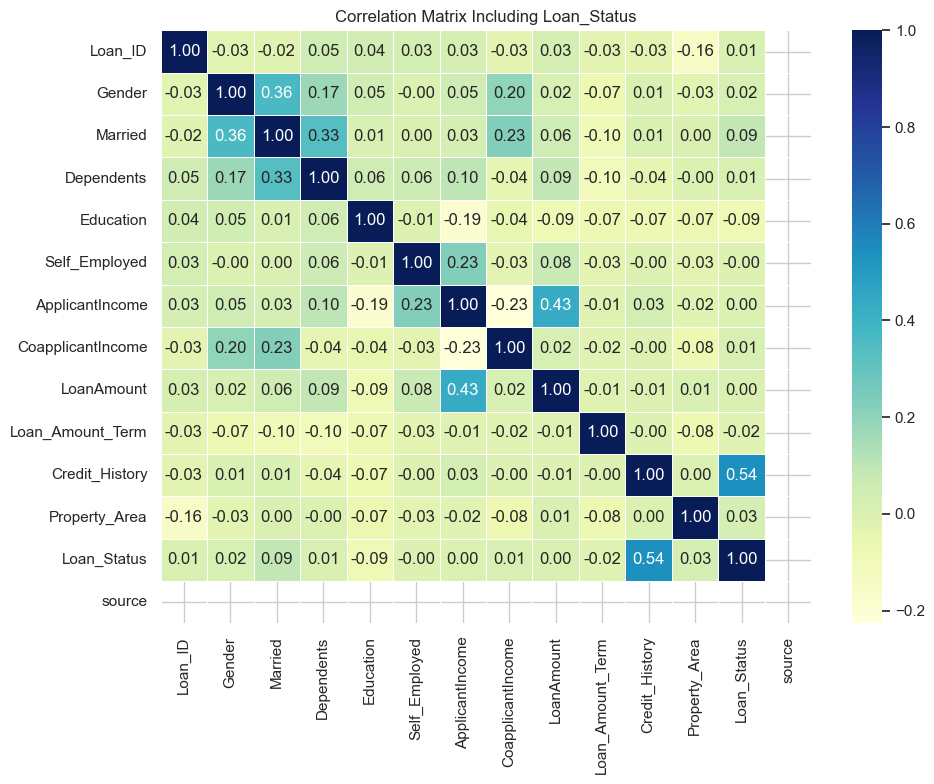


Chi-Square Test Results:
Gender: Chi2 = 0.11, p = 0.7391 → Not Significant
Married: Chi2 = 4.73, p = 0.0296 → Significant
Education: Chi2 = 4.09, p = 0.0431 → Significant
Self_Employed: Chi2 = 0.00, p = 1.0000 → Not Significant
Property_Area: Chi2 = 12.30, p = 0.0021 → Significant
Credit_History: Chi2 = 176.11, p = 0.0000 → Significant


In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 1. Compare Loan_Status distribution across categorical variables using proportions
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']

def plot_proportions(df, col):
    proportion_data = df.groupby([col, 'Loan_Status']).size().unstack().apply(lambda x: x / x.sum(), axis=1)
    proportion_data.plot(kind='bar', stacked=True, figsize=(7, 4), colormap='Set2')
    plt.title(f'Loan Status Proportion by {col}')
    plt.ylabel('Proportion')
    plt.xticks(rotation=0)
    plt.legend(title='Loan_Status', loc='upper right')
    plt.tight_layout()
    plt.show()

for col in cat_cols:
    plot_proportions(train, col)

# 2. Summary statistics of numerical variables grouped by Loan_Status
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
print("\nMean values grouped by Loan_Status:\n")
print(train.groupby('Loan_Status')[num_cols].mean().round(2))

# 3. Correlation matrix using label encoding for categorical variables
encoded_data = train.copy()
for col in encoded_data.select_dtypes(include='object').columns:
    encoded_data[col] = encoded_data[col].astype('category').cat.codes

plt.figure(figsize=(10, 8))
sns.heatmap(encoded_data.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title('Correlation Matrix Including Loan_Status')
plt.tight_layout()
plt.show()

# 4. Chi-square test results for categorical variables
def run_chi2(df, column):
    table = pd.crosstab(df[column], df['Loan_Status'])
    chi2, p, dof, _ = chi2_contingency(table)
    result = f"{column}: Chi2 = {chi2:.2f}, p = {p:.4f}"
    significance = "Significant" if p < 0.05 else "Not Significant"
    print(f"{result} → {significance}")

print("\nChi-Square Test Results:")
for col in cat_cols:
    run_chi2(train, col)


# EDA Results:

- Based on all the visualizations above as well as the Chi-Square Results, it seems very clear to me that Credit_History is the most significant Variable which determines the Loan_Status. As we progress further, we will evaluate Credit_History while analyzing different variables to see if they can be of use within our models on a performance basis. 

- To begin, we will start finding the Variance Inflation Factor and trim variables with a score greater of 10

In [43]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

# 1. Prepare data by encoding categorical variables
data_vif = train.copy()
label_encoder = LabelEncoder()

for col in data_vif.select_dtypes(include='object'):
    data_vif[col] = label_encoder.fit_transform(data_vif[col])

# 2. Drop target variable
X = data_vif.drop(columns='Loan_Status')

# 3. Create a DataFrame for VIF values
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Initial VIF computation
vif_result = calculate_vif(X)
print("Initial VIF values:")
print(vif_result.sort_values(by='VIF', ascending=False), "\n")

# 4. Trim features with high VIF (> 10)
while vif_result['VIF'].max() > 10:
    to_drop = vif_result.sort_values(by='VIF', ascending=False).iloc[0]['Feature']
    print(f"Dropping '{to_drop}' with VIF = {vif_result['VIF'].max():.2f}")
    X = X.drop(columns=to_drop)
    vif_result = calculate_vif(X)

# Final VIF summary
print("\nRemaining features after removing multicollinearity:")
print(vif_result.sort_values(by='VIF', ascending=False))


Initial VIF values:
              Feature        VIF
8          LoanAmount  38.066931
9    Loan_Amount_Term  21.483695
10     Credit_History   6.527390
1              Gender   6.316512
6     ApplicantIncome   4.745917
0             Loan_ID   3.976200
2             Married   3.809610
11      Property_Area   2.774488
7   CoapplicantIncome   2.175822
3          Dependents   1.814811
4           Education   1.354330
5       Self_Employed   1.222561
12             source        NaN 

Dropping 'LoanAmount' with VIF = 38.07
Dropping 'Loan_Amount_Term' with VIF = 11.48

Remaining features after removing multicollinearity:
              Feature       VIF
1              Gender  5.827506
8      Credit_History  4.974190
2             Married  3.788835
6     ApplicantIncome  3.493867
0             Loan_ID  3.317607
9       Property_Area  2.404540
7   CoapplicantIncome  2.020643
3          Dependents  1.800054
4           Education  1.304114
5       Self_Employed  1.222351
10             source     

/Users/rohitmuralidharan/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/Users/rohitmuralidharan/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/Users/rohitmuralidharan/anaconda3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


- Logistic Regression perfromed to recieve a baseline

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# 1. Prepare the data
df = train.copy()
le = LabelEncoder()

# Encode categorical features
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# 2. Split into features (X) and target (y)
X = df.drop(columns='Loan_Status')
y = df['Loan_Status']

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Fit logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 5. Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Baseline Logistic Regression Accuracy: {accuracy:.4f}")


Baseline Logistic Regression Accuracy: 0.7886


- Feature testing to see which which coefficients create a high impact to Loan_Status

In [45]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

# 1. Prepare the data (from previous steps)
df = train.copy()
le = LabelEncoder()

# Encode categorical features
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# 2. Split into features (X) and target (y)
X = df.drop(columns='Loan_Status')
y = df['Loan_Status']

# 3. Fit logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# 4. Get feature coefficients and their corresponding feature names
coefficients = model.coef_[0]  # Extracting the coefficients
feature_names = X.columns

# 5. Create a DataFrame to view feature names and their coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# 6. Sort by the magnitude of the coefficients (absolute values)
coef_df['Impact'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Impact', ascending=False)

# 7. Display the top features that impact Loan_Status
print("Features with the highest impact on Loan Status:")
print(coef_df[['Feature', 'Coefficient']].head(10))  # Top 10 most impactful features


Features with the highest impact on Loan Status:
             Feature  Coefficient
10    Credit_History     3.134580
2            Married     0.529489
4          Education    -0.492358
1             Gender    -0.027243
5      Self_Employed    -0.010129
11     Property_Area     0.006827
8         LoanAmount    -0.003210
9   Loan_Amount_Term    -0.002885
3         Dependents     0.001698
0            Loan_ID     0.000336


- From here we will begin to test our methods chosen using Credit_History as a predictor.
- We can test the methods chosen with additional features to check for improvement in the model fit.
- Below, we will begin to score CV and F1 Score for each method we have chosen.

In [46]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer

# 1. Prepare the data (encoding categorical features)
df = train.copy()
le = LabelEncoder()

# Encode categorical variables
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# 2. Define the target variable and features
X_all = df.drop(columns='Loan_Status')  # All features
y = df['Loan_Status']

# Only using 'Credit_History' as a predictor
X_credit_history = df[['Credit_History']]

# 3. List of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# 4. Function to perform cross-validation and F1 scoring
def evaluate_model(model, X, y):
    # Cross-validation score (accuracy)
    cv_score = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
    
    # F1 score using cross-validation predictions
    f1_scorer = make_scorer(f1_score)
    f1_cv = cross_val_score(model, X, y, cv=5, scoring=f1_scorer).mean()
    
    return cv_score, f1_cv

# 5. Iterate through models with only Credit_History as feature
print("Using only 'Credit_History' as the predictor:")
for name, model in models.items():
    cv_score, f1_cv = evaluate_model(model, X_credit_history, y)
    print(f"{name}: CV Score = {cv_score:.4f}, F1 Score = {f1_cv:.4f}")
    
print("\n------------------------------------------------------------")

# 6. Iterate through models with all features
print("Using all features as predictors:")
for name, model in models.items():
    cv_score, f1_cv = evaluate_model(model, X_all, y)
    print(f"{name}: CV Score = {cv_score:.4f}, F1 Score = {f1_cv:.4f}")


Using only 'Credit_History' as the predictor:
Logistic Regression: CV Score = 0.8095, F1 Score = 0.8767
Decision Tree: CV Score = 0.8095, F1 Score = 0.8767
Random Forest: CV Score = 0.8095, F1 Score = 0.8767
SVM: CV Score = 0.8095, F1 Score = 0.8767
KNN: CV Score = 0.8095, F1 Score = 0.8767

------------------------------------------------------------
Using all features as predictors:
Logistic Regression: CV Score = 0.8029, F1 Score = 0.8719
Decision Tree: CV Score = 0.6464, F1 Score = 0.7081
Random Forest: CV Score = 0.7736, F1 Score = 0.8368
SVM: CV Score = 0.6873, F1 Score = 0.8147
KNN: CV Score = 0.6042, F1 Score = 0.7376


- When using Credit_History as the predictor, it seems we have a lot of similarty between all five methods.
- When we iterated through all the predictors, it seemed to somewhat reduce performance across the board. 
- Using SVM model, we can try to tune the hyperparameters for a better fit. 

In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 1. Set up feature and target
feature = 'Credit_History'
X = train[[feature]]
y = train['Loan_Status']

# 2. Train-test split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Define SVM with RBF kernel and hyperparameter grid
search_space = {
    'C': [2**exp for exp in range(-5, 6)],
    'gamma': [2**exp for exp in range(-5, 6)]
}

svc = SVC(kernel='rbf')

# 4. Set up Grid Search with 5-fold stratified cross-validation
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
grid = GridSearchCV(estimator=svc, param_grid=search_space, cv=cv_strategy, scoring='accuracy', n_jobs=-1)

# 5. Fit the model
grid.fit(X_tr, y_tr)

# 6. Results summary
print(" Optimal Parameters:")
for param, val in grid.best_params_.items():
    print(f"  {param}: {val}")
    
print(f"\n Cross-validated Accuracy: {grid.best_score_:.4f}")

# 7. Evaluate best model on the test set
final_model = grid.best_estimator_
test_preds = final_model.predict(X_te)

print(f"\n Accuracy on Held-out Test Data: {accuracy_score(y_te, test_preds):.4f}")
print("\n Classification Report:")
print(classification_report(y_te, test_preds))


/Users/rohitmuralidharan/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/rohitmuralidharan/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/rohitmuralidharan/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/rohitmuralidharan/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/rohitmuralidharan/anaconda3/lib/python3.10/site-packages/

 Optimal Parameters:
  C: 0.03125
  gamma: 1

 Cross-validated Accuracy: 0.7984

 Accuracy on Held-out Test Data: 0.8537

 Classification Report:
              precision    recall  f1-score   support

           N       0.95      0.55      0.70        38
           Y       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



/var/folders/w8/xqm209c55_d0dct36jr38pym0000gn/T/ipykernel_9231/4145230586.py:26: FutureWarning: The provided callable <function mean at 0x111c05d80> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data = results_df.pivot_table(


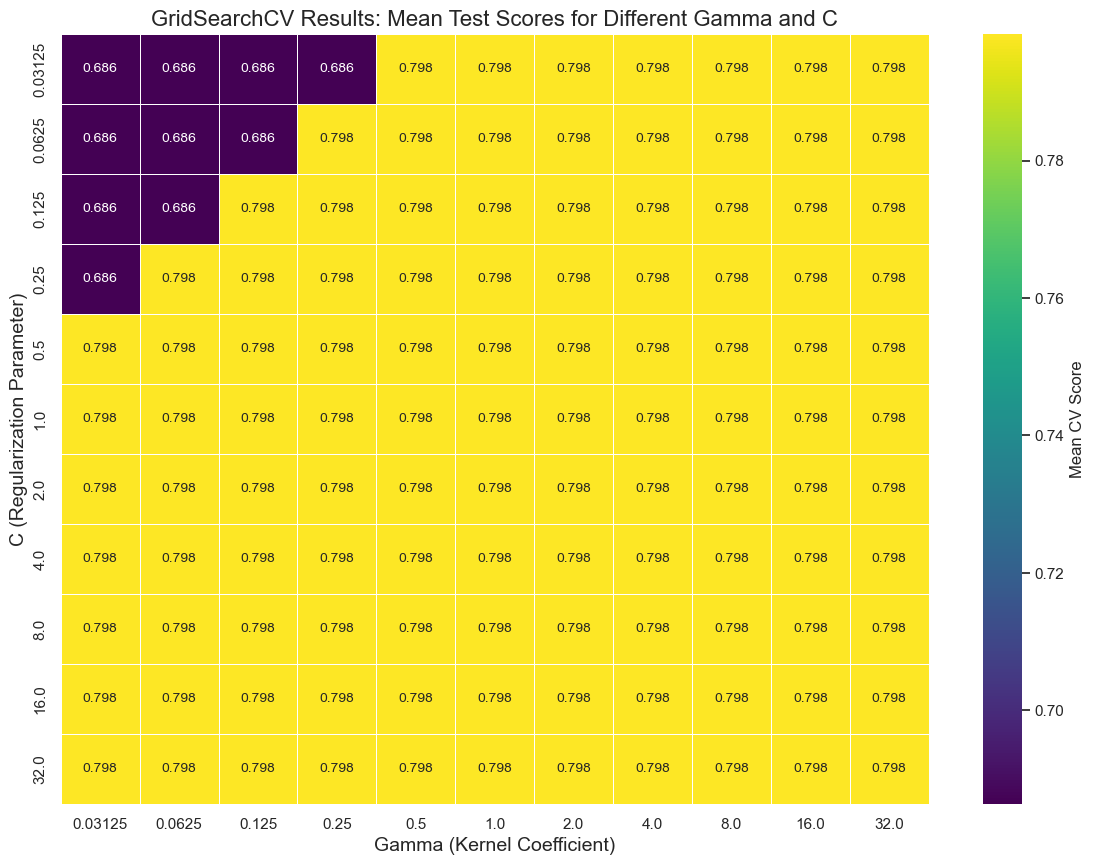

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# 1. Define estimator and grid
svm = SVC()
param_grid = {
    'C': [2**i for i in range(-5, 6)],
    'gamma': [2**i for i in range(-5, 6)]
}

# 2. Create and fit the GridSearchCV
grid_search = GridSearchCV(estimator=svm,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')
grid_search.fit(X_tr, y_tr)     # <-- make sure X_train, y_train are defined

# 3. Extract results
results_df = pd.DataFrame(grid_search.cv_results_)

# 4. Pivot to get heatmap data
heatmap_data = results_df.pivot_table(
    index='param_C',
    columns='param_gamma',
    values='mean_test_score',
    aggfunc=np.mean
)

# 5. Plot
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data,
            annot=True, fmt='.3f',
            cmap='viridis',
            cbar_kws={'label': 'Mean CV Score'},
            annot_kws={"size": 10},
            linewidths=0.5)
plt.title('GridSearchCV Results: Mean Test Scores for Different Gamma and C', fontsize=16)
plt.xlabel('Gamma (Kernel Coefficient)', fontsize=14)
plt.ylabel('C (Regularization Parameter)', fontsize=14)
plt.show()


- We seemed to have achieved an improvement of 78-80% Accuracy due to this test, so now we will apply it to our test data.

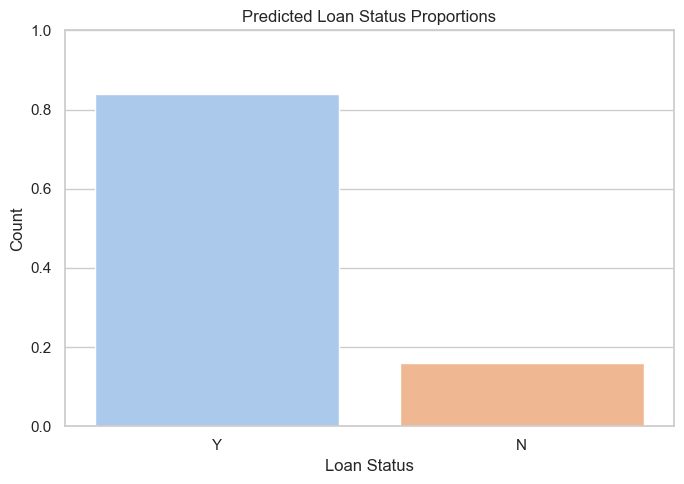

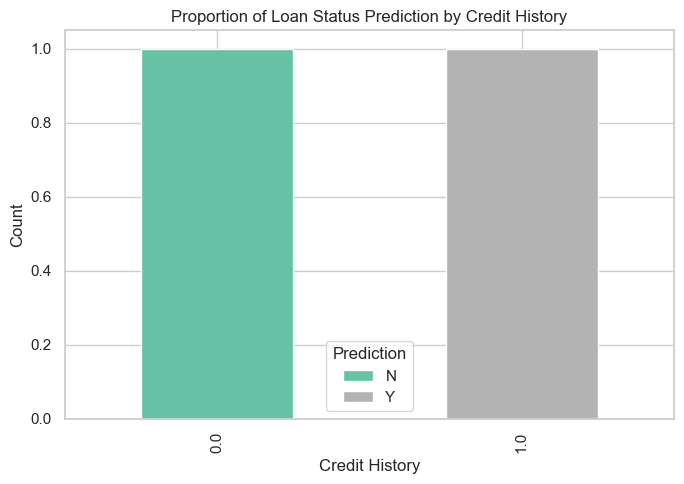

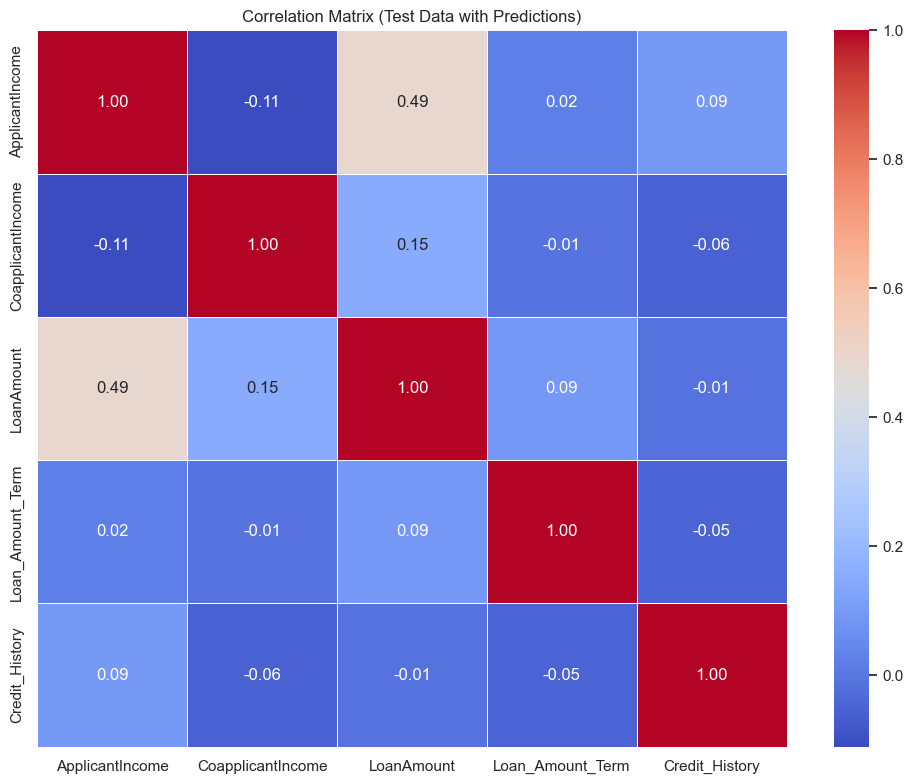

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Prepare data
X_train = train[['Credit_History']]
y_train = train['Loan_Status']
X_test = test[['Credit_History']]

# Encode target labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Define and train the best SVM model
best_model = SVC(C=0.1, gamma=0.5, kernel='rbf')
best_model.fit(X_train, y_train_encoded)

# Predict on the test set
y_pred = best_model.predict(X_test)
y_pred_labels = le.inverse_transform(y_pred)

# Attach predictions to test set
test['Loan_Status_Pred'] = y_pred_labels

# --- Visualization ---

# 1. Predicted Loan Status Proportions
prop_data = test['Loan_Status_Pred'].value_counts(normalize=True).reset_index()
prop_data.columns = ['Loan_Status_Pred', 'Count']
plt.figure(figsize=(7, 5))
sns.barplot(data=prop_data, x='Loan_Status_Pred', y='Count', palette='pastel')
plt.title('Predicted Loan Status Proportions')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# 2. Prediction Breakdown by Credit History (as proportions)
grouped = test.groupby('Credit_History')['Loan_Status_Pred'].value_counts(normalize=True).unstack().fillna(0)
grouped.plot(kind='bar', stacked=True, figsize=(7, 5), colormap='Set2')
plt.title('Proportion of Loan Status Prediction by Credit History')
plt.ylabel('Count')
plt.xlabel('Credit History')
plt.legend(title='Prediction')
plt.tight_layout()
plt.show()

# 3. Correlation Matrix (Excluding non-numeric and 'source' if present)
excluded = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'source']
numeric_cols = test.select_dtypes(include=[np.number]).drop(columns=[col for col in excluded if col in test.columns], errors='ignore')

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Test Data with Predictions)')
plt.tight_layout()
plt.show()


# Conclusion

 - I used Credit_History as our significant feature, so our model was able to predict the outcome of the test data pretty well by ONLY using it as our predictor. It seems to be that this dataset was not very complex as I chose it based on the amount of feedback on kaggle, and the fact it seemed to have the proper amount of information required to test my hypothesis on. Almost every feature on this dataset created a 1-1 alignment of Credit_History to Loan_Status as well. The linear relationship between these two explains why the accuracy of each model was somewhat identical as well. If we tried to modify the tuning parameters of every other model, I believe that we would've achieved insignificant improvements.
     
- Future improvements of this project would honestly stem from a dataset which was larger, maybe around 5-10x the current size of this data, which could've allowed me to find another feature which had a large impact like Credit_Score, which also could've impacted the results to show a larger difference within the model performance. 

- I beleive that this dataset may not have been the best to choose to employ more advanced analytical techniques due to it's size and simplicity. I feel, that if the data set was much larger amd had more than one feature which could've impacted the data at a larger scale, we could've employed much more robust testing.